In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
df = pd.read_csv('Mcdonald_1.csv')

In [13]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [5]:
df.describe().T
#for transpose

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
Calories from Fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
Total Fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
Saturated Fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
Trans Fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
Cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
Sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


In [6]:
df['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [7]:
df['Category'].nunique()

9

In [43]:
x

Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
dtype: int64

Text(0, 0.5, 'No. of Items')

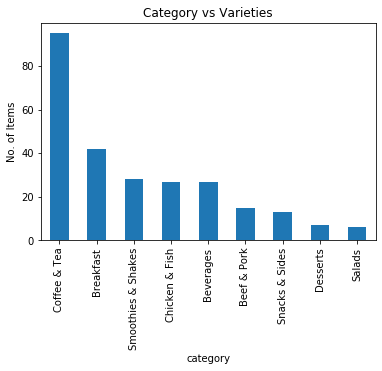

In [44]:
x = df[['Category','Item']].groupby(df['Category']).size().sort_values(ascending=False)
x.plot(kind='bar')
plt.title('Category vs Varieties')
plt.xlabel('category')
plt.ylabel('No. of Items')


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
Calories from Fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
Total Fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
Saturated Fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
Trans Fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
Cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
Sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


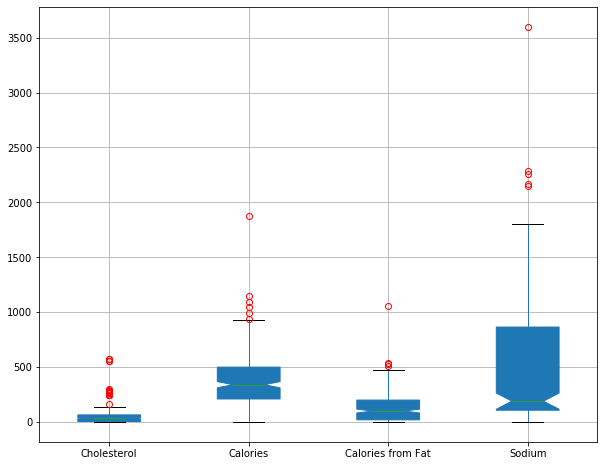

In [11]:
c='blue'
df.boxplot(column=['Cholesterol','Calories','Calories from Fat','Sodium'], patch_artist=True, notch=True, fontsize=10, figsize=(10,8), boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color= c),
            flierprops=dict(color=c, markeredgecolor='red'),
            medianprops=dict(color='black'))


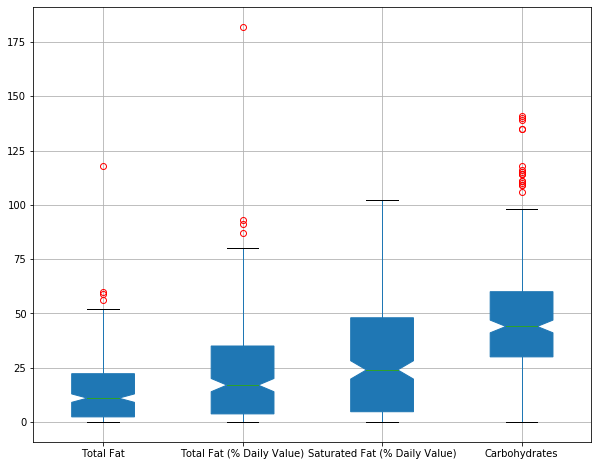

In [12]:
df.boxplot(column=['Total Fat', 'Total Fat (% Daily Value)',
       'Saturated Fat (% Daily Value)','Carbohydrates',], patch_artist=True, notch=True, fontsize=10, figsize=(10,8), boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color= c),
            flierprops=dict(color=c, markeredgecolor='red'),
            medianprops=dict(color='black'))

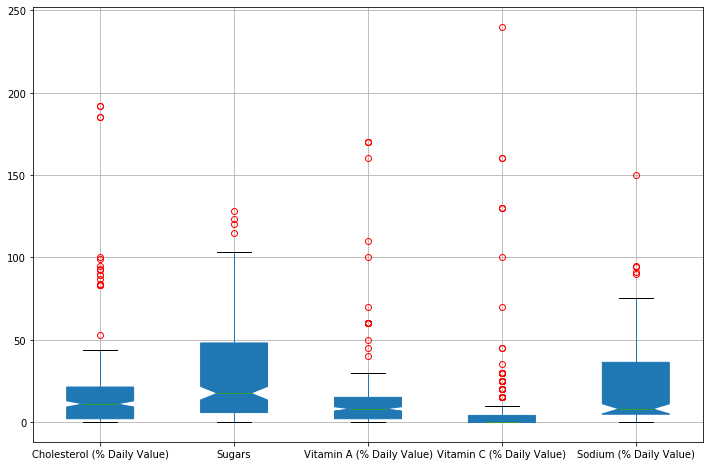

In [13]:
df.boxplot(column=['Cholesterol (% Daily Value)','Sugars','Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Sodium (% Daily Value)'], patch_artist=True, notch=True, fontsize=10, figsize=(12,8), boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color= c),
            flierprops=dict(color=c, markeredgecolor='red'),
            medianprops=dict(color='black'))

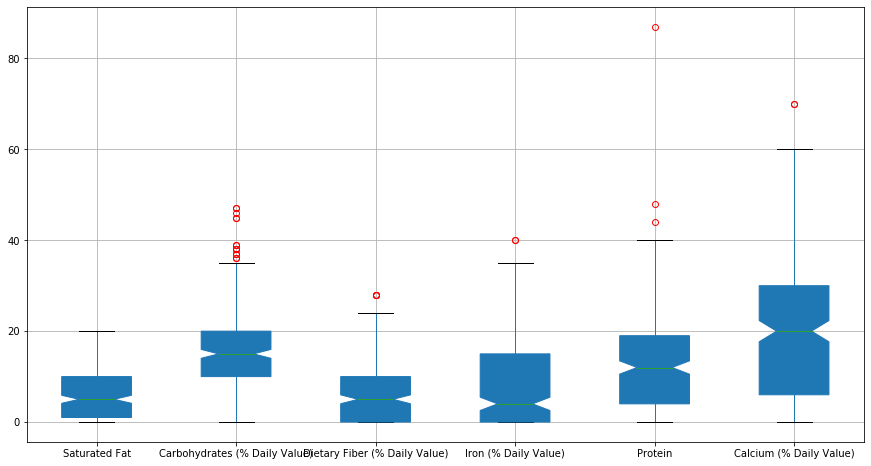

In [14]:
df.boxplot(column=['Saturated Fat','Carbohydrates (% Daily Value)',
       'Dietary Fiber (% Daily Value)', 'Iron (% Daily Value)', 'Protein','Calcium (% Daily Value)'], patch_artist=True, notch=True, fontsize=10, figsize=(15,8), boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color= c),
            flierprops=dict(color=c, markeredgecolor='red'),
            medianprops=dict(color='black'))

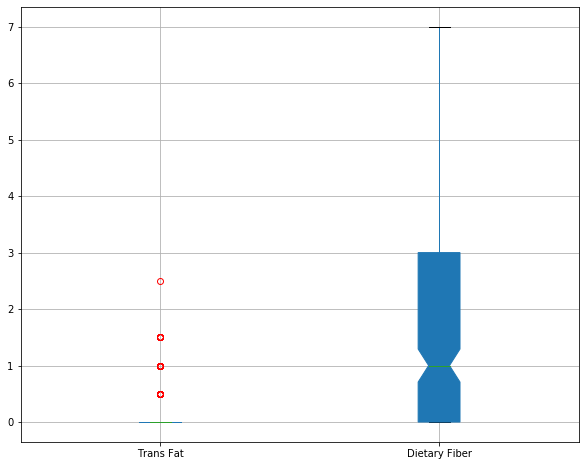

In [15]:
df.boxplot(column=['Trans Fat','Dietary Fiber'], patch_artist=True, notch=True, fontsize=10, figsize=(10,8), boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color= c),
            flierprops=dict(color=c, markeredgecolor='red'),
            medianprops=dict(color='black'))

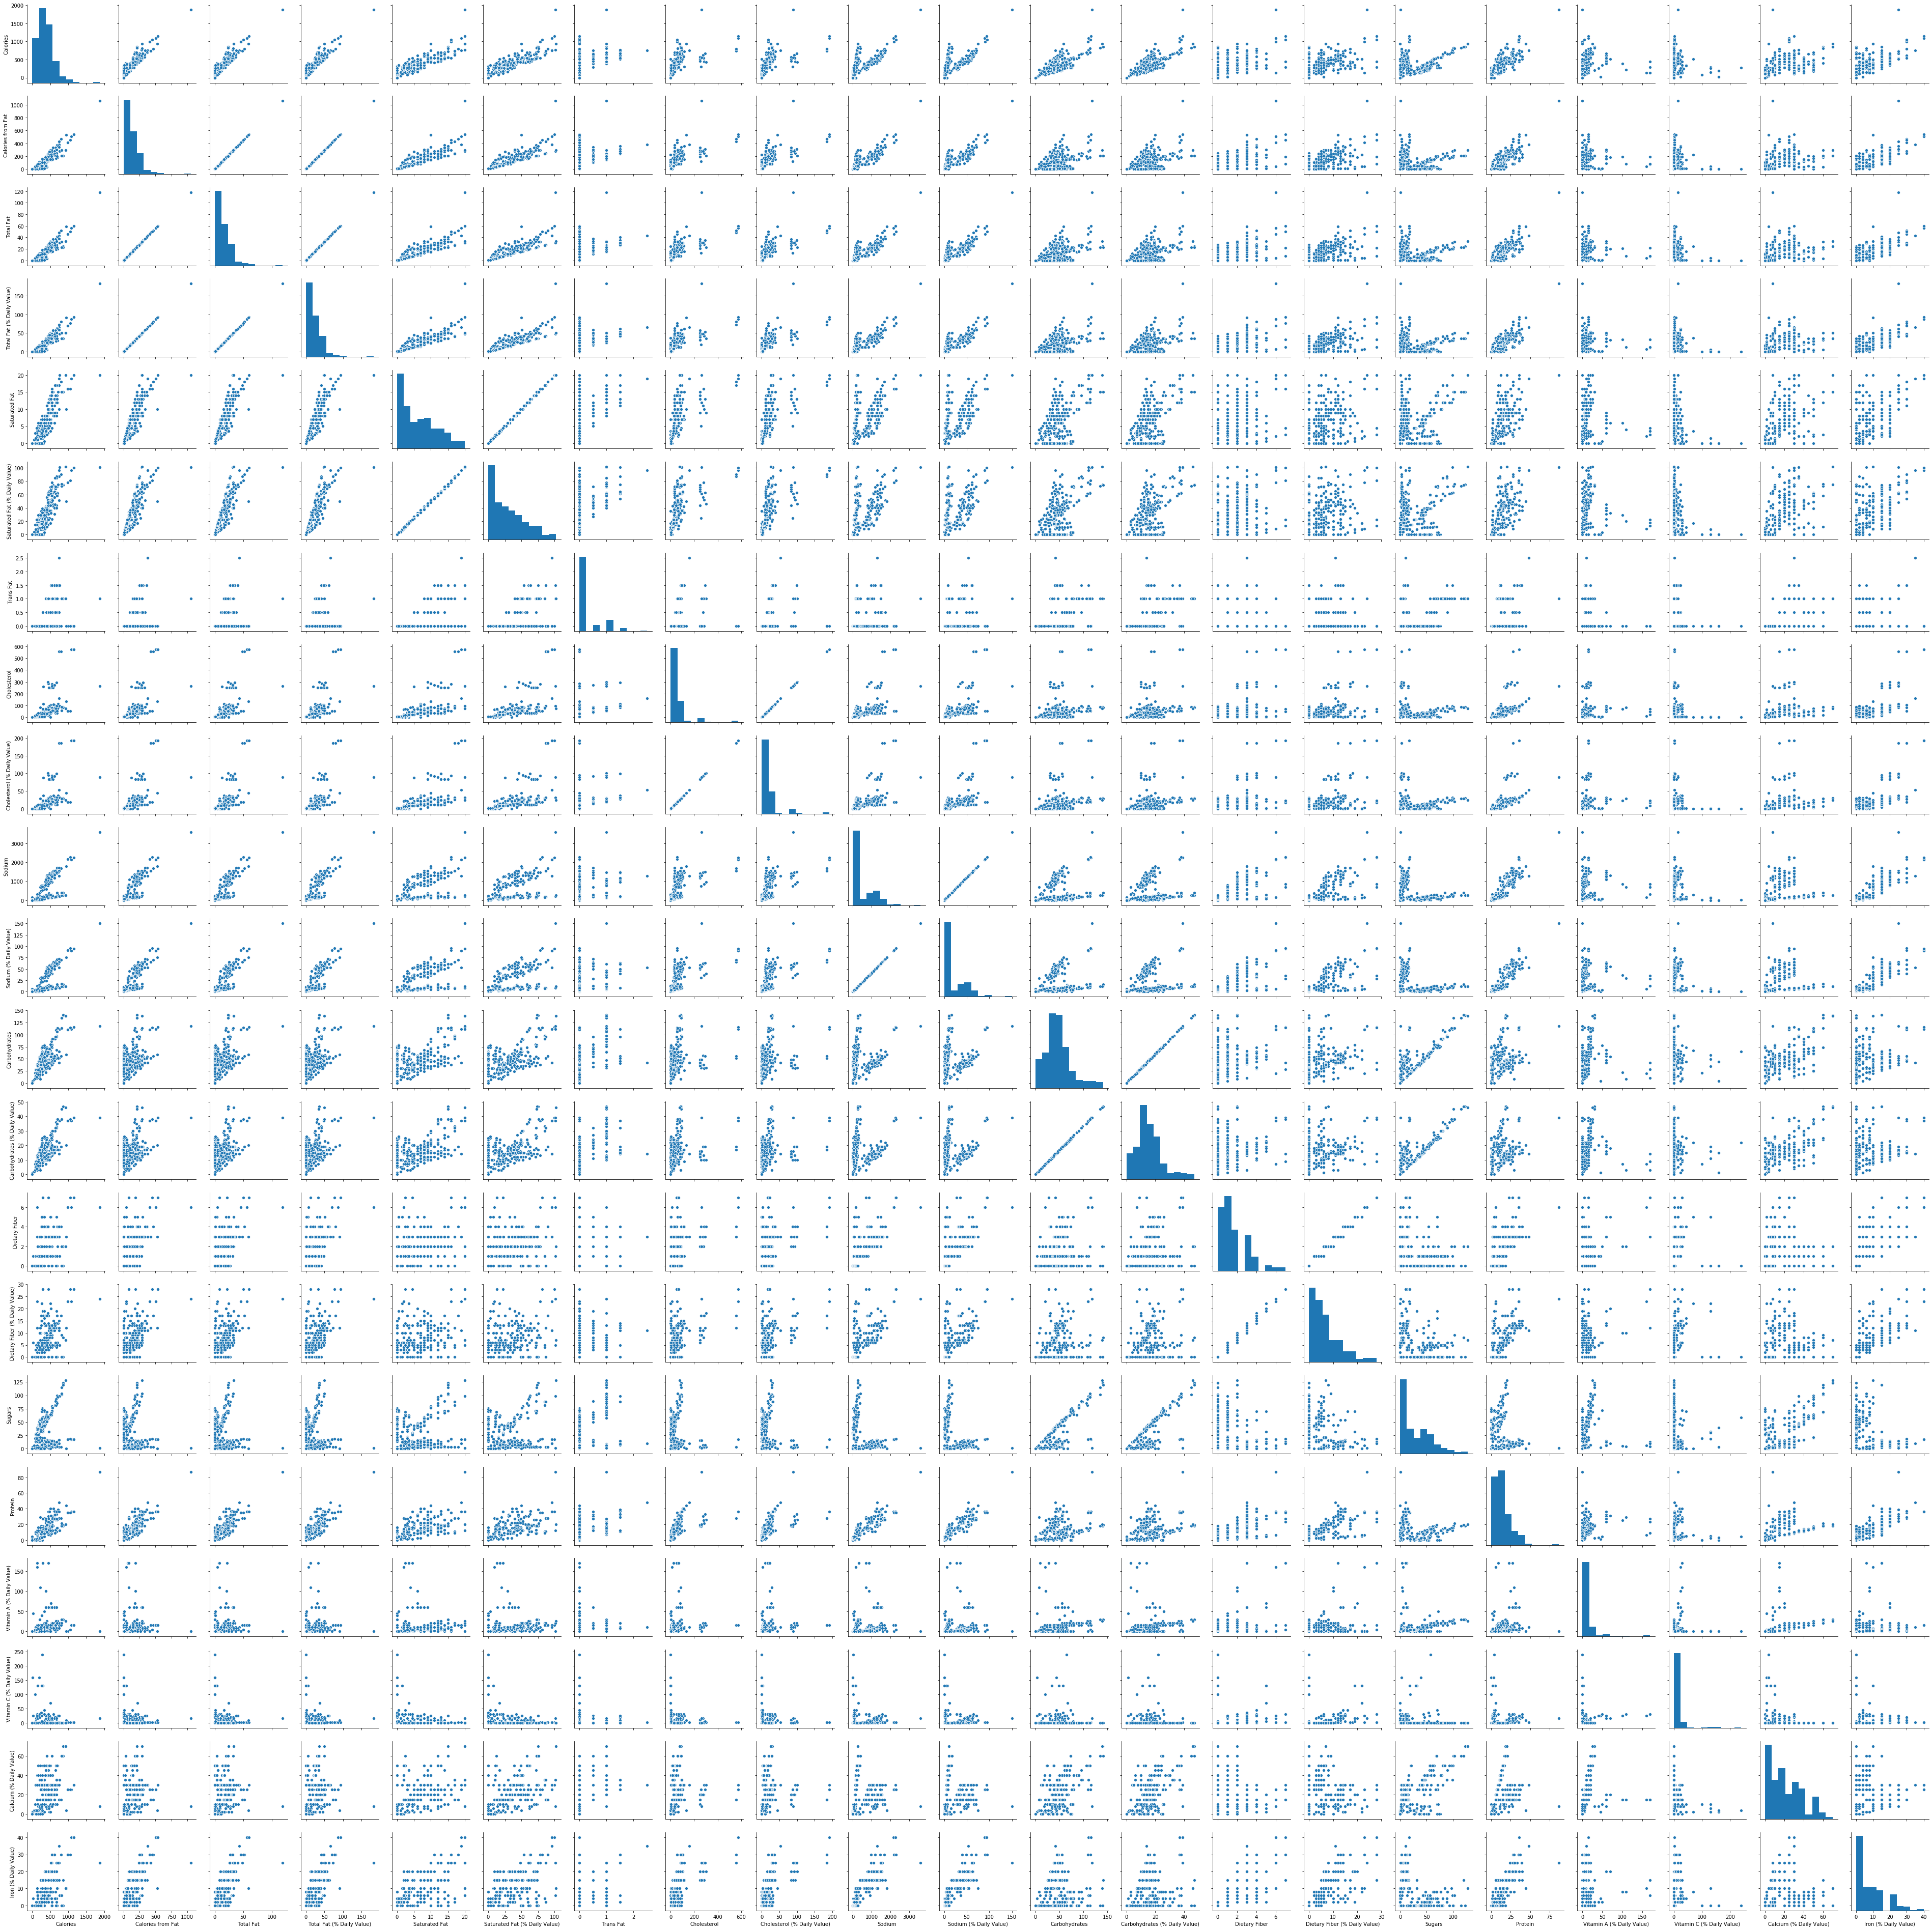

In [16]:
sns.pairplot(df)

In [28]:
chol= df[['Category','Cholesterol (% Daily Value)']].groupby(['Category']).sum()
chol.sort_values(by= ['Cholesterol (% Daily Value)'], ascending=False)

,Cholesterol (% Daily Value)
Category,
Breakfast,2140
Coffee & Tea,891
Chicken & Fish,681
Beef & Pork,434
Smoothies & Shakes,412
Salads,104
Snacks & Sides,81
Desserts,34
Beverages,5


In [93]:
df['Item'][df['Sodium']== df['Sodium'].max()]

82    Chicken McNuggets (40 piece)
Name: Item, dtype: object

In [97]:
df[['Item','Saturated Fat']].sort_values(by='Saturated Fat', ascending=False).head(n=4)

,Item,Saturated Fat
231,Frappé Chocolate Chip (Large),20.0
82,Chicken McNuggets (40 piece),20.0
32,Big Breakfast with Hotcakes (Large Biscuit),20.0
253,McFlurry with M&M’s Candies (Medium),20.0


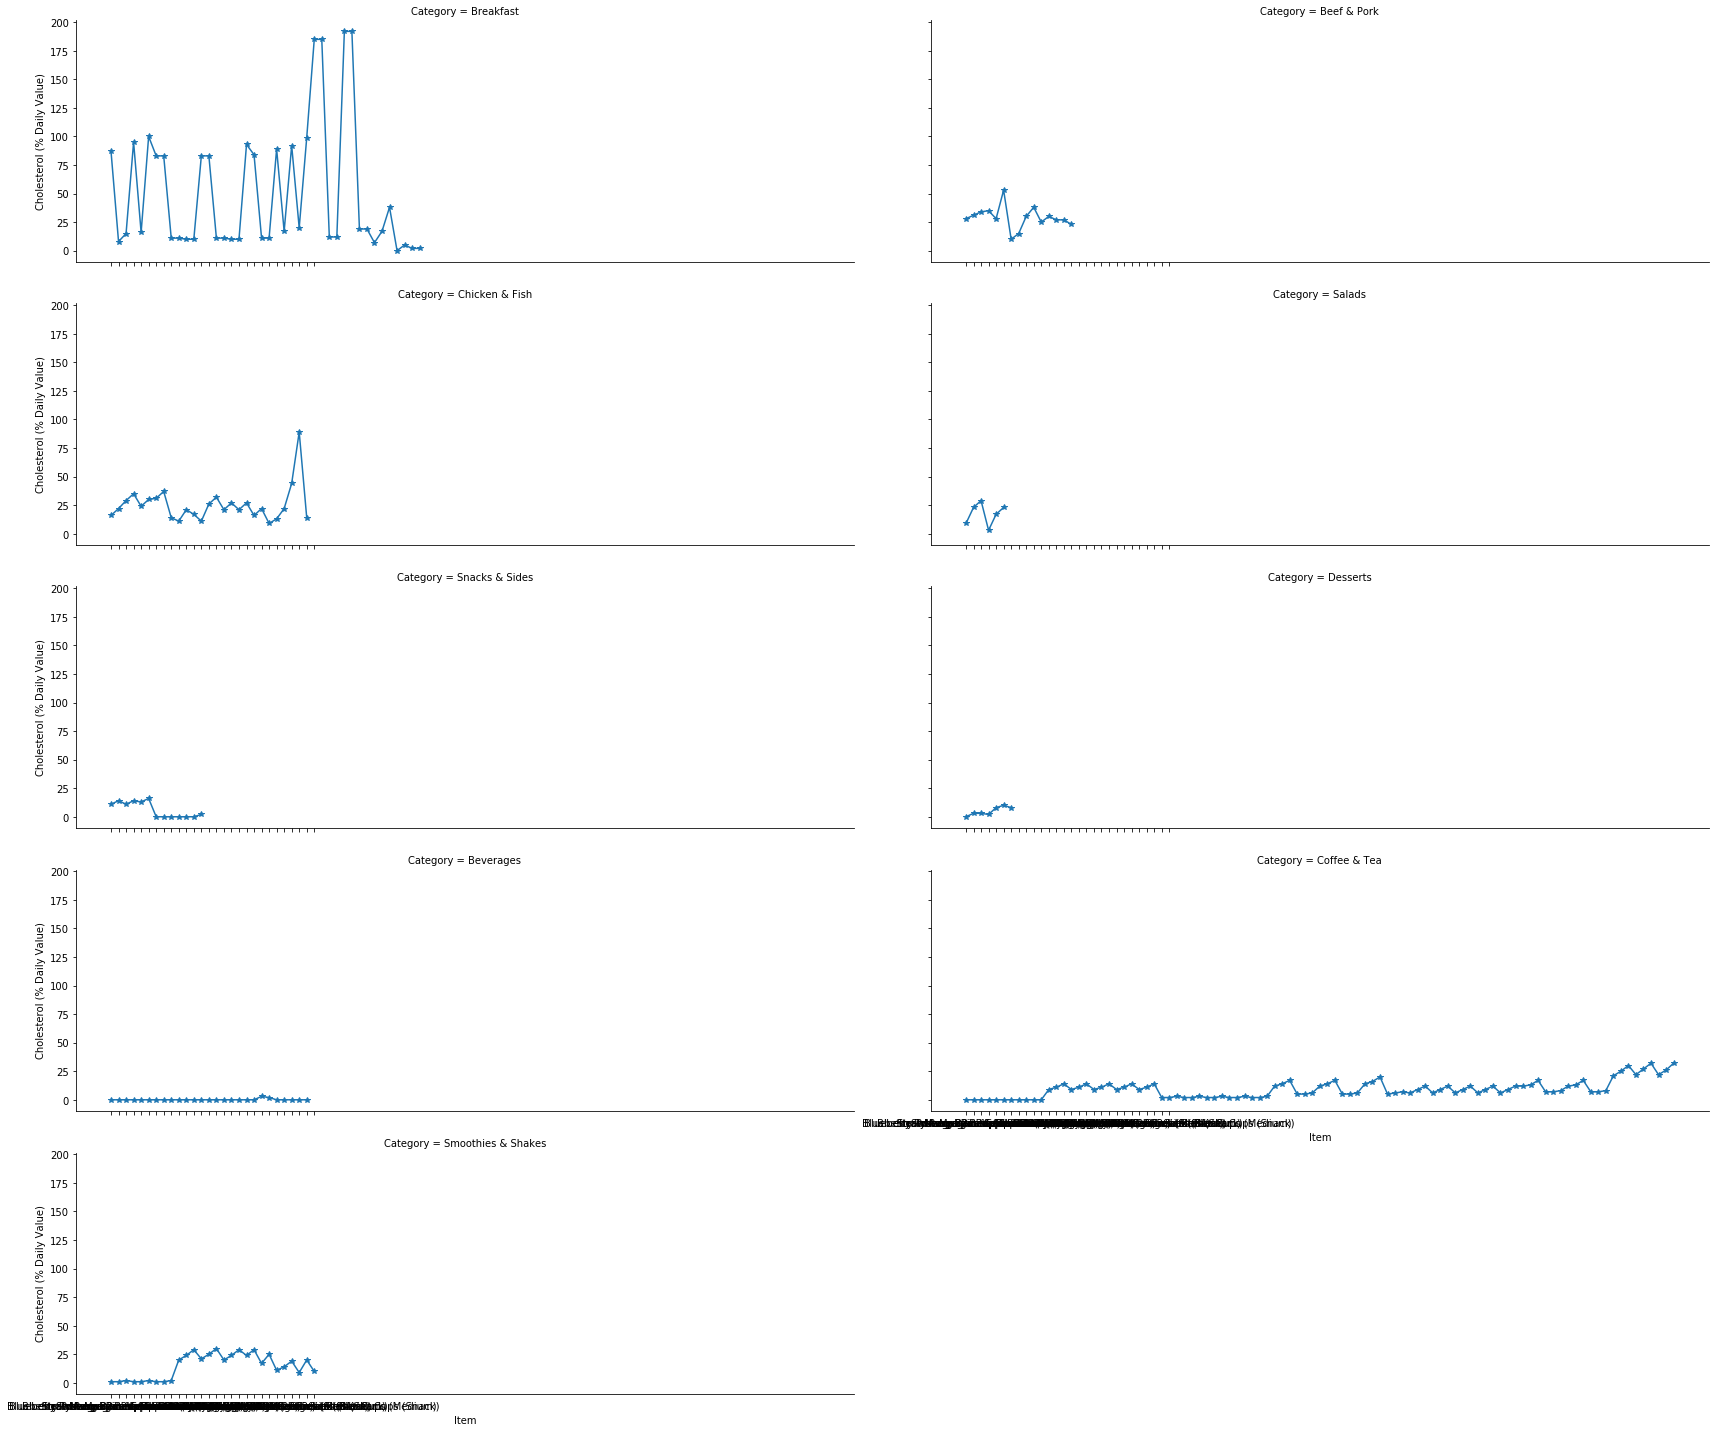

In [34]:
g = sns.FacetGrid(df, col="Category", col_wrap=2, aspect =3, height=4)
g = g.map(plt.plot, "Item", "Cholesterol (% Daily Value)", marker="*").add_legend()
plt.show()


In [23]:
def get_redundant_pairs(df1):
    
    pairs_to_drop = set()
    cols = df1.columns
    for i in range(0, df1.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

get_redundant_pairs(df1)

{('Calcium (% Daily Value)', 'Calcium (% Daily Value)'),
 ('Calcium (% Daily Value)', 'Calories'),
 ('Calcium (% Daily Value)', 'Calories from Fat'),
 ('Calcium (% Daily Value)', 'Carbohydrates'),
 ('Calcium (% Daily Value)', 'Carbohydrates (% Daily Value)'),
 ('Calcium (% Daily Value)', 'Cholesterol'),
 ('Calcium (% Daily Value)', 'Cholesterol (% Daily Value)'),
 ('Calcium (% Daily Value)', 'Dietary Fiber'),
 ('Calcium (% Daily Value)', 'Dietary Fiber (% Daily Value)'),
 ('Calcium (% Daily Value)', 'Protein'),
 ('Calcium (% Daily Value)', 'Saturated Fat'),
 ('Calcium (% Daily Value)', 'Saturated Fat (% Daily Value)'),
 ('Calcium (% Daily Value)', 'Sodium'),
 ('Calcium (% Daily Value)', 'Sodium (% Daily Value)'),
 ('Calcium (% Daily Value)', 'Sugars'),
 ('Calcium (% Daily Value)', 'Total Fat'),
 ('Calcium (% Daily Value)', 'Total Fat (% Daily Value)'),
 ('Calcium (% Daily Value)', 'Trans Fat'),
 ('Calcium (% Daily Value)', 'Vitamin A (% Daily Value)'),
 ('Calcium (% Daily Value)', 'Vit

In [80]:
def get_top_abs_correlations(df1):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:20]
    

get_top_abs_correlations(df1)

Sodium                     Sodium (% Daily Value)           0.999929
Cholesterol                Cholesterol (% Daily Value)      0.999855
Total Fat                  Total Fat (% Daily Value)        0.999765
Calories from Fat          Total Fat (% Daily Value)        0.999725
                           Total Fat                        0.999663
Carbohydrates              Carbohydrates (% Daily Value)    0.999620
Saturated Fat              Saturated Fat (% Daily Value)    0.999279
Dietary Fiber              Dietary Fiber (% Daily Value)    0.986350
Calories                   Calories from Fat                0.904588
                           Total Fat                        0.904409
                           Total Fat (% Daily Value)        0.904123
Sodium                     Iron (% Daily Value)             0.871593
Sodium (% Daily Value)     Iron (% Daily Value)             0.870742
                           Protein                          0.869870
Sodium                     Protein

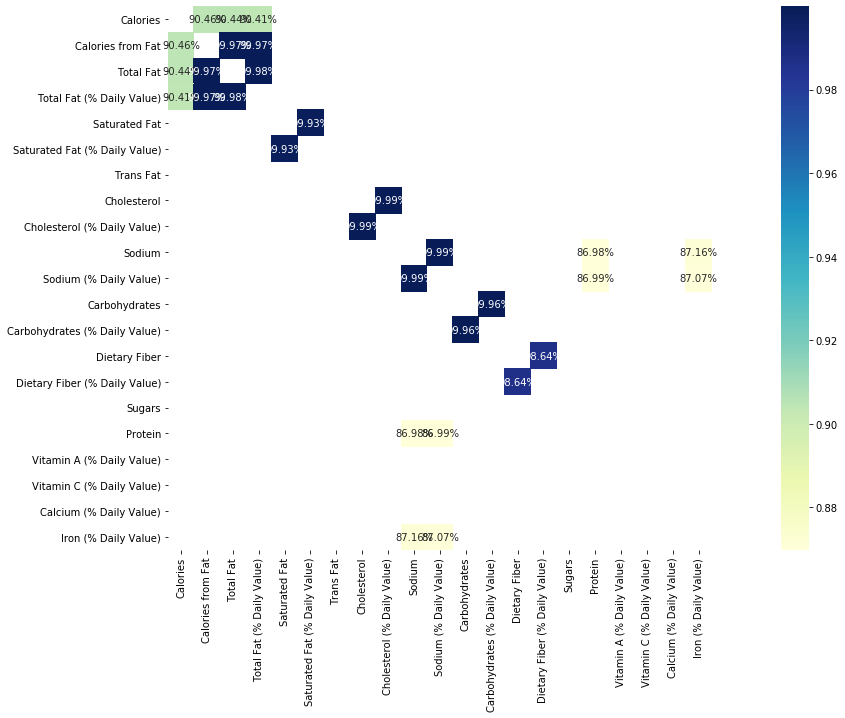

In [108]:
labels_to_drop = get_redundant_pairs(df)
a= df1.corr()
a[a==1]=0
b = a[a >=.85]

plt.figure(figsize=(25,10))
sns.heatmap(b,annot=True,fmt=".2%",cmap="YlGnBu", square=True)

In [76]:
#df1 = df.drop(df[['Serving Size']], axis = 1, inplace = True)
df1=df
df1.drop(df1[['Category','Item','Serving Size']], axis = 1, inplace = True)
df1

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,510,150,17.0,26,9.0,44,0.5,45,14,280,...,80,27,1,4,64,12,15,0,40,8
256,690,200,23.0,35,12.0,58,1.0,55,19,380,...,106,35,1,5,85,15,20,0,50,10
257,340,100,11.0,17,6.0,29,0.0,30,9,190,...,53,18,1,2,43,8,10,0,25,6
258,810,290,32.0,50,15.0,76,1.0,60,20,400,...,114,38,2,9,103,21,20,0,60,6


In [5]:
df

,Variables,Outliers
0,Category,Not applicable
1,Item,Not applicable
2,Serving Size,Not applicable
3,Calories,Outlier Present
4,Calories from Fat,Outlier Present
5,Total Fat,Outlier Present
6,Total Fat (% Daily Value),Outlier Present
7,Saturated Fat,Outlier Not Present
8,Saturated Fat (% Daily Value),Outlier Not Present
9,Trans Fat,Outlier Present


In [67]:
df[['Category','Item','Protein']].sort_values(by='Protein',ascending=0).head(10)

,Category,Item,Protein
0,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,40.0
1,Chicken & Fish,Premium Grilled Chicken Club Sandwich,40.0
2,Beef & Pork,Quarter Pounder with Bacon & Cheese,37.0
3,Beef & Pork,Quarter Pounder with Bacon Habanero Ranch,37.0
4,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,36.0
5,Chicken & Fish,Premium McWrap Chicken & Bacon (Grilled Chicken),36.0
6,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,32.0
7,Chicken & Fish,Premium McWrap Southwest Chicken (Grilled Chic...,31.0
8,Breakfast,"Bacon, Egg & Cheese Bagel",30.0
9,Breakfast,"Bacon, Egg & Cheese Bagel with Egg Whites",30.0


In [57]:
data_bins=df
data_bins['bins']=pd.cut(data_bins['Calories'],3, labels =["A", "B", "C"])

In [58]:
data_bins.groupby("bins").describe().T

bins                                 A           B       C
Calories             count  110.000000   27.000000     1.0
                     mean   385.272727  794.444444  1880.0
                     std    140.836030  144.922614     NaN
                     min     15.000000  640.000000  1880.0
                     25%    282.500000  680.000000  1880.0
...                                ...         ...     ...
Iron (% Daily Value) min      0.000000    0.000000    25.0
                     25%      6.000000    7.000000    25.0
                     50%     15.000000   15.000000    25.0
                     75%     20.000000   25.000000    25.0
                     max     30.000000   40.000000    25.0

[168 rows x 3 columns]

In [59]:
A=data_bins[data_bins["bins"]=="A"]
B=data_bins[data_bins["bins"]=="B"]
C=data_bins[data_bins["bins"]=="C"]
X=[A,B,C]
for i in X:
    print(i.describe().T)

                               count        mean         std   min     25%  \
Calories                       110.0  385.272727  140.836030  15.0  282.50   
Calories from Fat              110.0  151.363636   86.440596   0.0   80.00   
Total Fat                      110.0   16.795455    9.633489   0.0    8.25   
Total Fat (% Daily Value)      110.0   25.900000   14.837932   0.0   13.00   
Saturated Fat                  110.0    6.227273    4.121791   0.0    3.00   
Saturated Fat (% Daily Value)  110.0   31.136364   20.604835   0.0   15.00   
Trans Fat                      110.0    0.186364    0.405575   0.0    0.00   
Cholesterol                    110.0   64.909091   73.422186   0.0   25.00   
Cholesterol (% Daily Value)    110.0   21.554545   24.523191   0.0    8.00   
Sodium                         110.0  743.636364  490.008383   0.0  190.00   
Sodium (% Daily Value)         110.0   30.981818   20.397419   0.0    8.00   
Carbohydrates                  110.0   42.445455   17.356270   4

In [46]:
A[['Category','Item','Protein']].sort_values(by='Protein',ascending=0).head(10)

,Category,Item,Protein
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,40
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,40
44,Beef & Pork,Quarter Pounder with Bacon & Cheese,37
45,Beef & Pork,Quarter Pounder with Bacon Habanero Ranch,37
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,36
71,Chicken & Fish,Premium McWrap Chicken & Bacon (Grilled Chicken),36
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,32
75,Chicken & Fish,Premium McWrap Southwest Chicken (Grilled Chic...,31
24,Breakfast,"Bacon, Egg & Cheese Bagel",30
25,Breakfast,"Bacon, Egg & Cheese Bagel with Egg Whites",30


In [60]:
data_qcut=df
data_qcut['cut'] = pd.qcut(df['Calories'], q=4, labels=["25%", "50%", "75%","100%"])
data_qcut

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),cut,bins
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,4,17,3,17,10,0,25,15,25%,A
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,4,17,3,18,6,0,25,8,25%,A
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,4,17,2,14,8,0,25,10,50%,A
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,4,17,2,21,15,0,30,15,50%,A
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,4,17,2,21,6,0,25,10,50%,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,1,4,64,12,15,0,40,8,75%,A
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,1,5,85,15,20,0,50,10,100%,B
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,1,2,43,8,10,0,25,6,50%,A
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,2,9,103,21,20,0,60,6,100%,B


In [61]:
A1=data_qcut[data_qcut["cut"]=="25%"]
B1=data_qcut[data_qcut["cut"]=="50%"]
C1=data_qcut[data_qcut["cut"]=="75%"]
D1=data_qcut[data_qcut["cut"]=="100%"]
X=[A1,B1,C1,D1]
for i in X:
    print(i['Calories'].describe())

count     36.000000
mean     220.555556
std       83.158865
min       15.000000
25%      157.500000
50%      250.000000
75%      280.000000
max      330.000000
Name: Calories, dtype: float64
count     35.000000
mean     395.714286
std       39.279220
min      340.000000
25%      360.000000
50%      400.000000
75%      430.000000
max      450.000000
Name: Calories, dtype: float64
count     32.000000
mean     510.000000
std       33.408517
min      460.000000
25%      480.000000
50%      510.000000
75%      532.500000
max      570.000000
Name: Calories, dtype: float64
count      35.000000
mean      788.571429
std       240.246722
min       590.000000
25%       655.000000
50%       700.000000
75%       835.000000
max      1880.000000
Name: Calories, dtype: float64


In [55]:
df.drop(df[df['Category'] == 'Coffee & Tea'].index, inplace = True)
df.drop(df[df['Category'] == 'Beverages'].index, inplace = True) 

In [56]:
df['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Smoothies & Shakes'], dtype=object)

In [65]:
D1['Item'].unique()

array(['Bacon, Egg & Cheese Bagel', 'Steak, Egg & Cheese Bagel',
       'Big Breakfast (Regular Biscuit)', 'Big Breakfast (Large Biscuit)',
       'Big Breakfast with Egg Whites (Regular Biscuit)',
       'Big Breakfast with Egg Whites (Large Biscuit)',
       'Big Breakfast with Hotcakes (Regular Biscuit)',
       'Big Breakfast with Hotcakes (Large Biscuit)',
       'Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)',
       'Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)',
       'Quarter Pounder with Bacon & Cheese',
       'Quarter Pounder with Bacon Habanero Ranch',
       'Double Quarter Pounder with Cheese', 'Bacon Clubhouse Burger',
       'Premium Crispy Chicken Club Sandwich',
       'Premium Crispy Chicken Ranch BLT Sandwich',
       'Bacon Clubhouse Crispy Chicken Sandwich',
       'Bacon Clubhouse Grilled Chicken Sandwich',
       'Premium McWrap Chicken & Bacon (Crispy Chicken)',
       'Premium McWrap Chicken & Ranch (Crispy Chicken)',
       'Pre